In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
file = open('../datasets/csv/booking-data.csv', 'r')
data = pd.read_csv(file)
file.close()
data = data.drop(data.columns[0], axis = 1)
data.head()

,Time,Booking
0,1.0,2269.588613
1,2.0,2225.412282
2,3.0,2206.237742
3,4.0,2238.169025
4,5.0,2186.846897


<IPython.core.display.Javascript object>


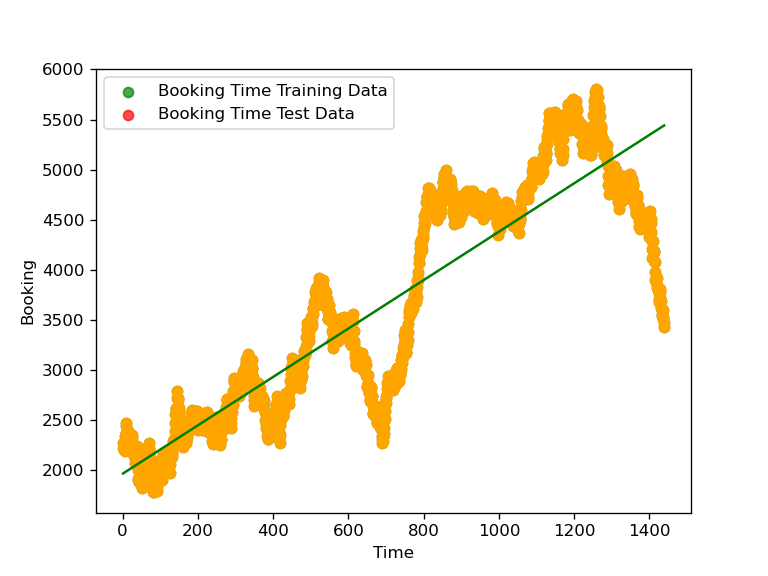

In [3]:
data.plot(kind = 'scatter', x = 'Time', y = 'Booking', c = 'blue')
plt.show()

In [4]:
xTrain, xTest, yTrain, yTest = train_test_split(data.Time, data.Booking)
plt.scatter(xTrain, yTrain, label = 'Booking Time Training Data', color = 'g', alpha = .7)
plt.scatter(xTest, yTest, label = 'Booking Time Test Data', color = 'red', alpha = .7)
plt.legend()
plt.show()

In [5]:
time = data['Time'].values
booking = data['Booking'].values

meanTime = np.mean(time)
meanBooking = np.mean(booking)

n = 0
d = 0

for i in range(0, len(time)):
    n += (time[i] - meanTime) * (booking[i] - meanBooking)
    d += (time[i] - meanTime) ** 2

slope = n/d
constant = meanBooking - (slope*meanTime)
slope, constant

(2.4163143163462215, 1964.5543520796111)

In [6]:
timeMax = np.max(time)
timeMin = np.min(time) 
x = np.linspace(timeMin, timeMax)
y = slope * x + constant

In [7]:
plt.plot(x, y , color = 'green', label = 'regression line')
plt.scatter(time, booking, c = 'orange', label= 'scatter data')
plt.xlabel('Time')
plt.ylabel('Booking')
plt.legend
plt.show()

In [8]:
totalSumSq = 0
totalSumSqResidual = 0

for i in range(0, len(time)):
    yPred = slope * time[i] + constant
    totalSumSq += (booking[i] - meanBooking) ** 2
    totalSumSqResidual += (booking[i] - yPred) ** 2

R = 1 - (totalSumSqResidual/totalSumSq)
R

0.7904224807962299